# Network Analysis of PhilGEPS: A Bipartite Analysis of Government Organization and Corporate Awardees (Year 2019 Analysis)

This is a raw notebook of the analysis for the year 2019. A merged analysis can be found at `Network-Science-Final-Project-with-Journal-Insights`.

## Import libraries required

In [4]:
#Import all the necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community
import collections
from networkx.algorithms import bipartite
import seaborn as sns

## Loading Datasets

### 2019 Datasets

Using the Bid and Award Details for 2019. Data was downloaded from: https://www.philgeps.gov.ph/opendataSRD.html. The data was collected for January to December 2019.

In [5]:
df1_2019 = pd.read_excel('Bid Notice and Award Details Jan-Mar 2019.xlsx',header=3)

In [6]:
df2_2019 = pd.read_excel('Bid Notice and Award Details Apr-Jun 2019.xlsx',header=3)

In [7]:
df3_2019 = pd.read_excel('Bid Notice and Award Details July-Sept 2019.xlsx',header=3)

In [8]:
df4_2019 = pd.read_excel('Bid Notice and Award Details Oct-Dec 2019.xlsx',header=3)

The dataframes were combined to a new dataframe `df`

In [9]:
df_2019 = pd.concat([df1_2019, df2_2019, df3_2019, df4_2019], ignore_index=True)

In [10]:
df_2019.columns

Index(['Organization Name', 'Reference ID', 'Solicitation No.', 'Notice Title',
       'Publish Date', 'Classification', 'Notice Type', 'Business Category',
       'Funding Source', 'Funding Instrument', 'Procurement Mode',
       'Trade Agreement', 'Approved Budget of the Contract',
       'Area of Delivery', 'Contract Duration', 'Calendar Type',
       'Line Item No', 'Item Name', 'Item Desc', 'Quantity', 'UOM',
       'Item Budget', 'PreBid Date', 'Closing Date', 'Notice Status',
       'Award No.', 'Award Title', 'Award Type', 'UNSPSC Code',
       'UNSPSC Description', 'Awardee Corporate Title', 'Contract Amount',
       'Contract No', 'Publish Date(Award)', 'Award Date',
       'Notice to Proceed Date', 'Contract Efectivity Date',
       'Contract End Date', 'Reason for Award', 'Award Status'],
      dtype='object')

In [11]:
df_2019.head(5)

Organization Name  Reference ID             Solicitation No.  \
0  DEPARTMENT OF EDUCATION - ARMM       5934798  DEPED ARMM ASECSPP-434-2018   
1         BARANGAY 8, LUCENA CITY       5937639                         2018   
2                  CITY OF ILOILO       5937646                   18-12-0872   
3       PROVINCE OF EASTERN SAMAR       5937908                 2018-12-0559   
4       PROVINCE OF EASTERN SAMAR       5937983                 2018-12-0560   

                                        Notice Title Publish Date  \
0  Procurement of Garden Kits (tools and seeds) i...   2019-01-01   
1  Purchase of Food for Senior Citizen Gen. Assembly   2019-01-01   
2  SUPPLY AND DELIVERY OF MULTI-PURPOSE VEHICLE (...   2019-01-01   
3  2018-12-0559 - INVITATION TO BID FOR  IMPROVEM...   2019-01-01   
4  2018-12-0560 - INVITATION TO BID FOR  CONSTRUC...   2019-01-01   

  Classification                  Notice Type  \
0          Goods  Request for Quotation (RFQ)   
1          Goods  Request for Quotation (RFQ)   
2          Goods      Invitation to Bid (ITB)   
3    Civil Works      Invitation to Bid (ITB)   
4    Civil Works      Invitation to Bid (ITB)   

                                   Business Category  \
0  Agricultural Products (Seeds, Seedlings, Plant...   
1                                  Catering Services   
2                                           Vehicles   
3                              Construction Projects   
4                              Construction Projects   

                        Funding Source  \
0  Government of the Philippines (GOP)   
1  Government of the Philippines (GOP)   
2  Government of the Philippines (GOP)   
3  Government of the Philippines (GOP)   
4  Government of the Philippines (GOP)   

                                  Funding Instrument  ...  \
0                         General Appropriations Act  ...   
1  Budget for the Contract Approved by the Sanggu...  ...   
2  Budget for the Contract Approved by the Sanggu...  ...   
3  Budget for the Contract Approved by the Sanggu...  ...   
4  Budget for the Contract Approved by the Sanggu...  ...   

  Awardee Corporate Title Contract Amount  \
0                     NaN             NaN   
1                     NaN             NaN   
2                     NaN             NaN   
3            YFL BUILDERS       1974402.0   
4    5 STAR J ENTERPRISES       1993625.2   

                                         Contract No     Publish Date(Award)  \
0                                                NaN                     NaT   
1                                                NaN                     NaT   
2                                                NaN                     NaT   
3  2018-12-0559 - INVITATION TO BID FOR IMPROVEME... 2019-02-27 15:23:44.163   
4  2018-12-0560 - INVITATION TO BID FOR CONSTRUCT... 2019-02-27 15:01:07.757   

   Award Date Notice to Proceed Date  Contract Efectivity Date  \
0         NaT                    NaT                       NaT   
1         NaT                    NaT                       NaT   
2         NaT                    NaT                       NaT   
3  2019-02-06    2019-02-08 01:00:00       2019-02-09 01:00:00   
4  2019-02-06    2019-02-08 01:00:00       2019-02-09 01:00:00   

    Contract End Date                   Reason for Award  Award Status  
0                 NaT                                NaN           NaN  
1                 NaT                                NaN           NaN  
2                 NaT                                NaN           NaN  
3 2019-03-25 01:00:00  Lowest Calculated Responsive Bid        Updated  
4 2019-03-30 01:00:00   Lowest Calculated Responsive Bid       Updated  

[5 rows x 40 columns]

To check if the dataframes combined properly

In [12]:
df1_2019.shape[0]+df2_2019.shape[0]+df3_2019.shape[0]+df4_2019.shape[0]-df_2019.shape[0]

0

# Exploratory Data Analysis

## 2019 Exploratory Data Analysis

### Funding Instrument Distribution Plot

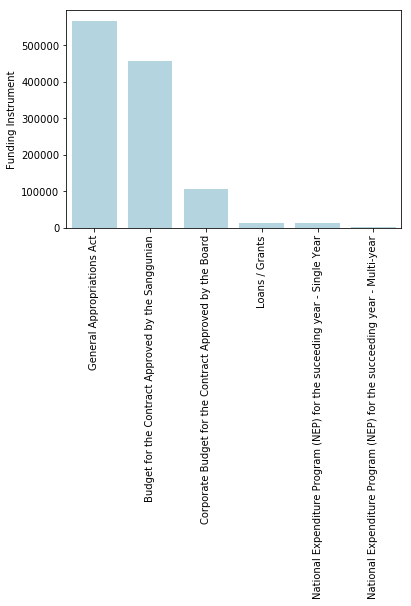

In [89]:
top = df_2019['Funding Instrument'].value_counts()
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Notice Type Distribution Plot

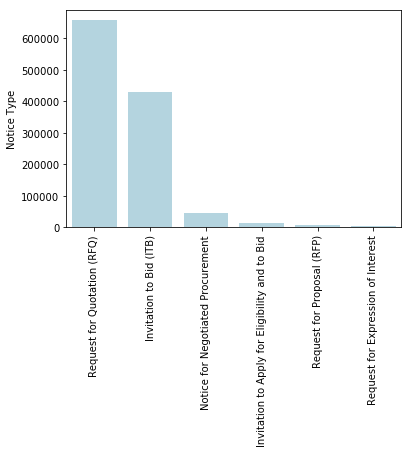

In [90]:
top = df_2019['Notice Type'].value_counts()
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Reason for Award Distribution Plot

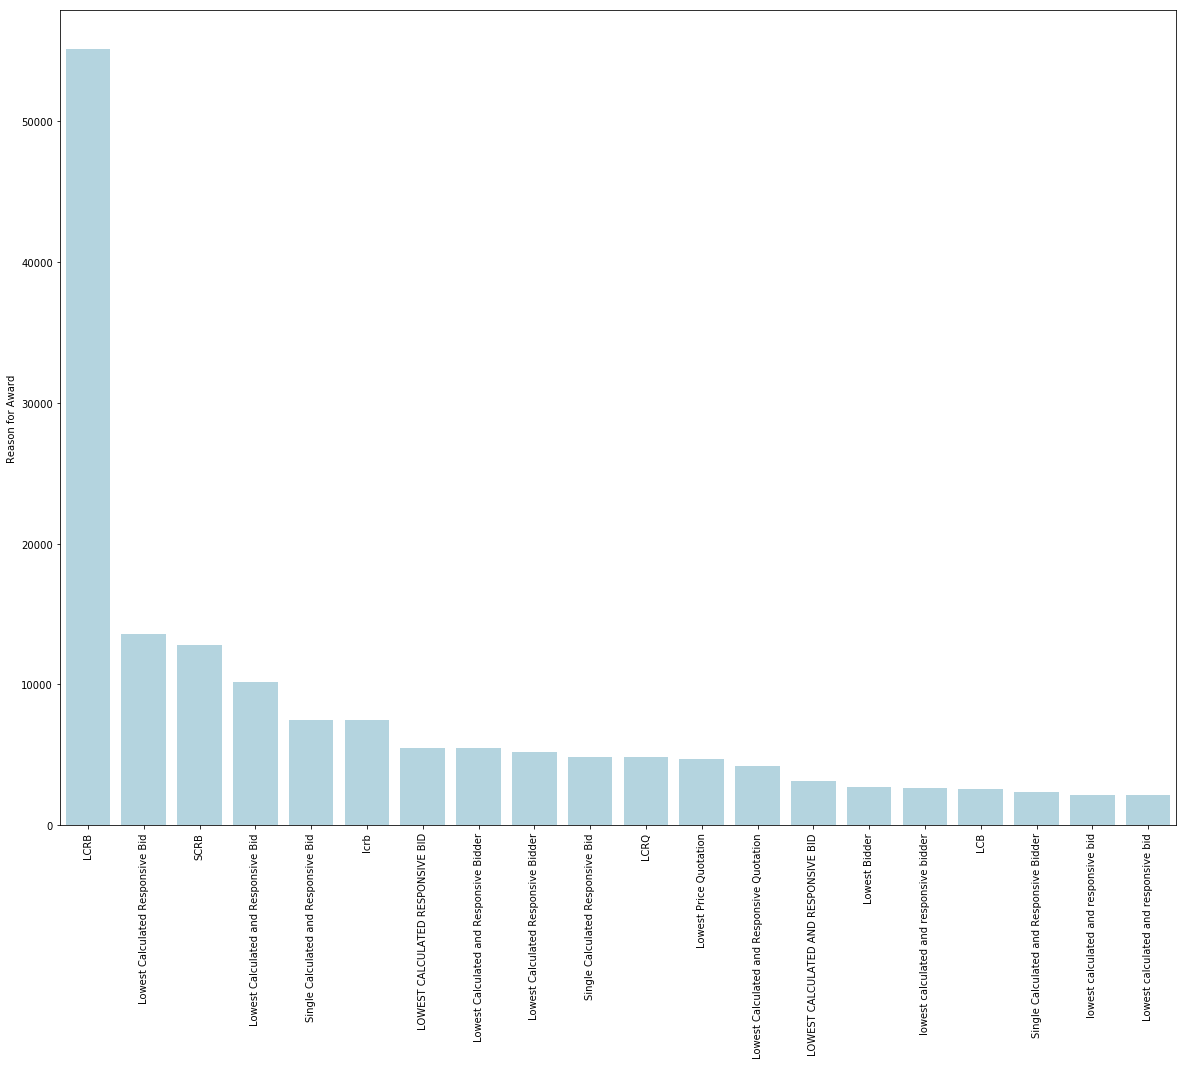

In [91]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
top = df_2019['Reason for Award'].value_counts().head(20)
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


### Business Category Distribution Plot

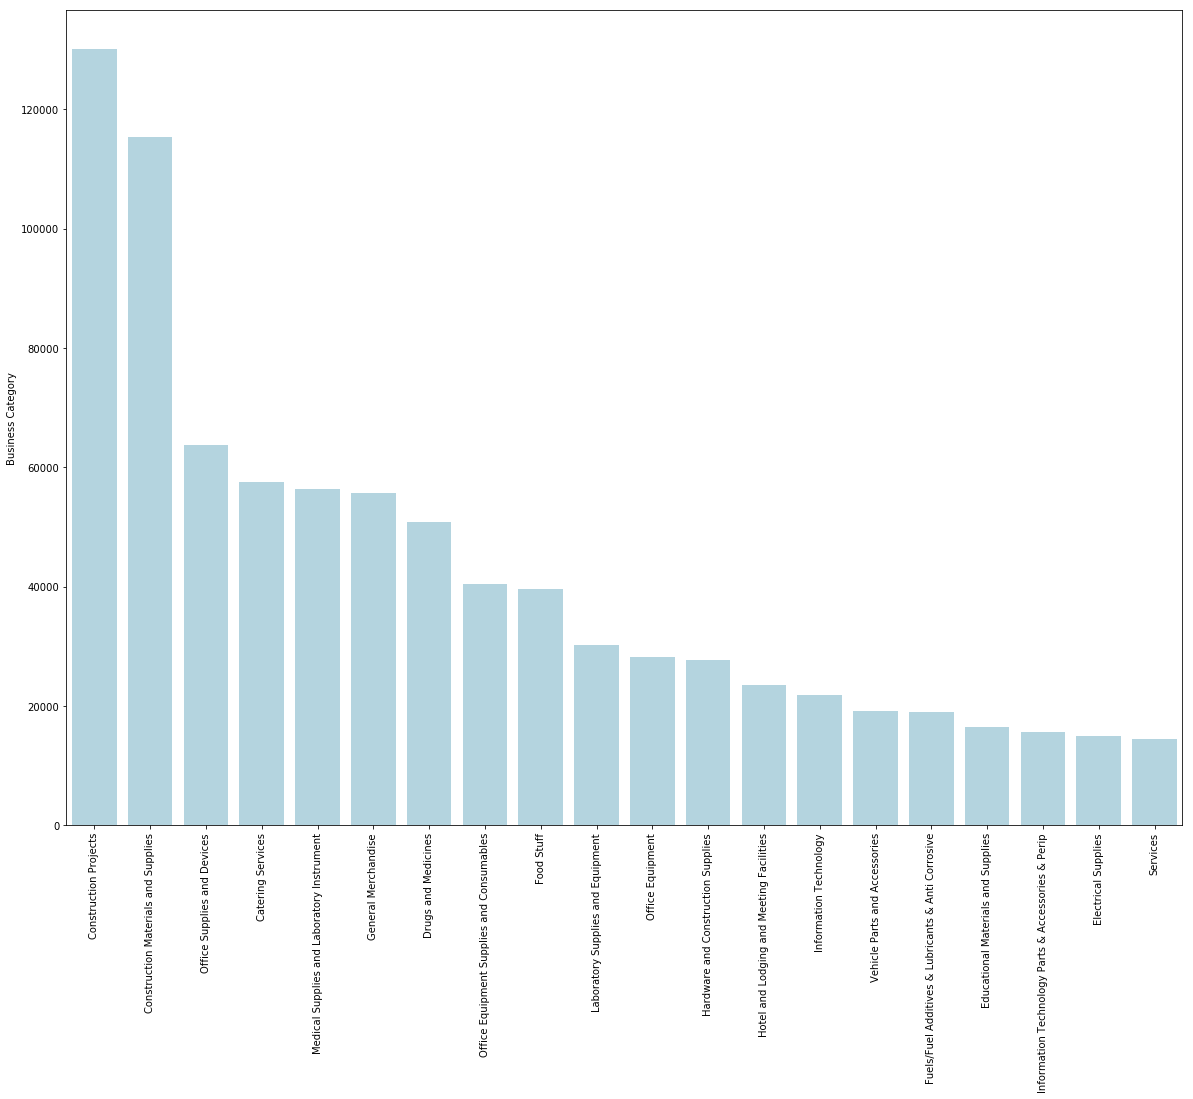

In [92]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
top = df_2019['Business Category'].value_counts().head(20)
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


### Contract Amount by Notice Type Boxplot

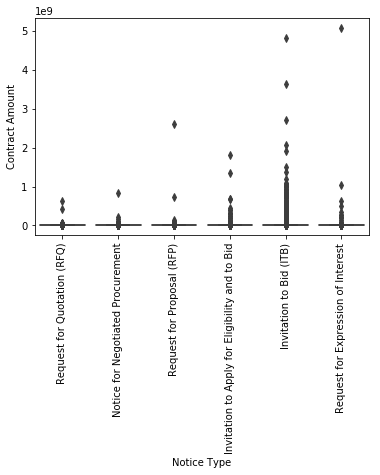

In [17]:
sorted_nb = df_2019.groupby(['Notice Type'])['Contract Amount'].median().sort_values()
chart = sns.boxplot(x=df_2019['Notice Type'], y=df_2019['Contract Amount'], order=list(sorted_nb.index))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Contract Amount by Business Category Boxplot

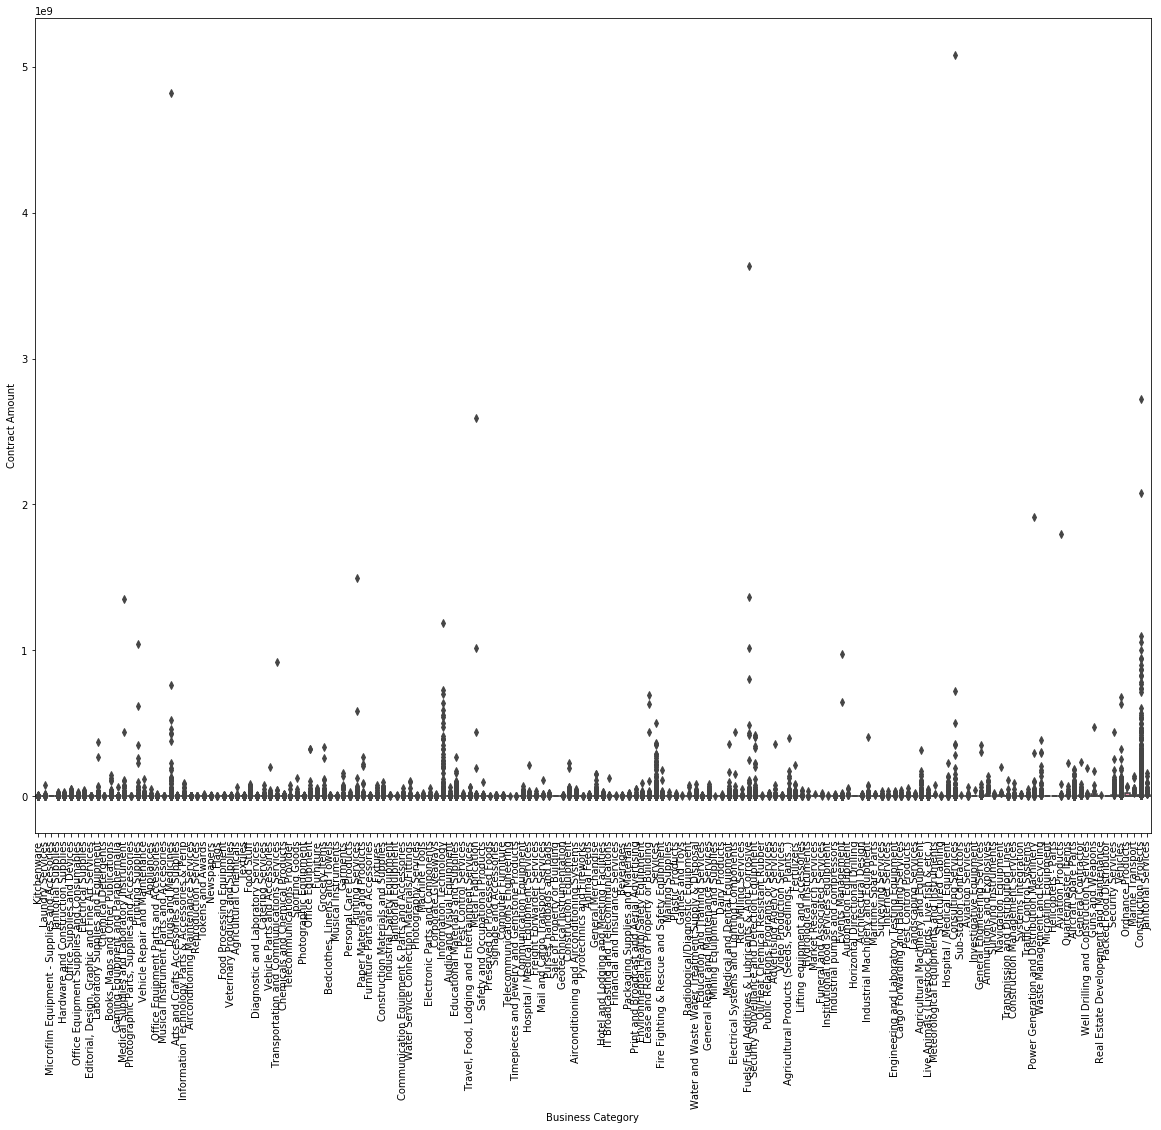

In [18]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sorted_nb = df_2019.groupby(['Business Category'])['Contract Amount'].median().sort_values()
chart = sns.boxplot(x=df_2019['Business Category'], y=df_2019['Contract Amount'], ax=ax, order=list(sorted_nb.index))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Contract Amount vs Approved Budget of the Contract Jointplot

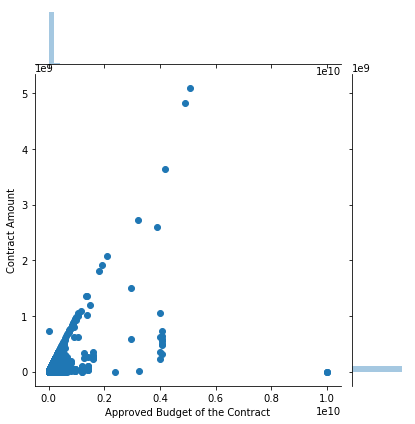

In [19]:
sns.jointplot(x=df_2019['Approved Budget of the Contract'], y=df_2019['Contract Amount']);

# Building the Network

## Building the Network for Year 2019

### Filtering Using a Hard Threshold on Contract Amount

Only the top 20% of the `Contract Amount` will be taken. The threshold amount is **822,492 Philippine Pesos**

In [20]:
df_2019['Contract Amount'].quantile(0.8)

822492.6000000007

In [21]:
df_filtered_2019 = df_2019.loc[df_2019['Contract Amount'] > 0]

In [22]:
d_2019=df_2019.loc[df_2019['Awardee Corporate Title'] =="MASANGKAY COMPUTER CENTER"]

In [23]:
d_2019['Business Category'].unique()

array(['Information Technology Parts & Accessories & Perip',
       'Office Equipment Supplies and Consumables', 'Office Equipment',
       'Information Technology',
       'Communication Equipment & Parts and Accessories',
       'General Merchandise', 'Computer Furniture',
       'Telecommunications Provider', 'Laboratory Supplies and Equipment',
       'Airconditioning and Airconditioning Systems', 'Printing Supplies',
       'Printing Services'], dtype=object)

In [24]:
d_2019= d_2019[['Business Category','Contract Amount']]

In [25]:
d_2019

Business Category  Contract Amount
4974     Information Technology Parts & Accessories & P...          98400.0
8706             Office Equipment Supplies and Consumables         306600.0
15710                                     Office Equipment         163875.0
16341                                     Office Equipment         923730.0
20240                                     Office Equipment          70300.0
...                                                    ...              ...
1105503  Information Technology Parts & Accessories & P...         349840.0
1108053                        Telecommunications Provider         600000.0
1114006          Office Equipment Supplies and Consumables         122500.0
1120026        Airconditioning and Airconditioning Systems         159000.0
1136666                                   Office Equipment         638500.0

[132 rows x 2 columns]

In [26]:
d_2019.groupby(['Business Category']).sum()


Contract Amount
Business Category                                                  
Airconditioning and Airconditioning Systems            3.940000e+05
Communication Equipment & Parts and Accessories        4.467914e+06
Computer Furniture                                     4.849100e+05
General Merchandise                                    4.597937e+06
Information Technology                                 1.448106e+08
Information Technology Parts & Accessories & Perip     3.072160e+07
Laboratory Supplies and Equipment                      2.129240e+05
Office Equipment                                       1.599926e+07
Office Equipment Supplies and Consumables              4.291000e+05
Printing Services                                      4.742000e+04
Printing Supplies                                      5.824000e+04
Telecommunications Provider                            1.987300e+06

In [27]:
df_filtered_2019['Contract Amount'].min()

0.01

In [28]:
df_filtered_2019

Organization Name  Reference ID  \
3                    PROVINCE OF EASTERN SAMAR       5937908   
4                    PROVINCE OF EASTERN SAMAR       5937983   
10                         PROVINCE OF PALAWAN       5938673   
11                              CITY OF ILOILO       5938674   
12                              CITY OF ILOILO       5938695   
...                                        ...           ...   
1157845           NATIONAL TAX RESEARCH CENTER       6781168   
1157846           NATIONAL TAX RESEARCH CENTER       6781169   
1157951             ILIGAN CITY CENTRAL SCHOOL       6781071   
1158175  LAND TRANSPORTATION OFFICE - REGION X       6781188   
1158176  LAND TRANSPORTATION OFFICE - REGION X       6781196   

                                          Solicitation No.  \
3                                             2018-12-0559   
4                                             2018-12-0560   
10                              B2 SB6 PEO 300-18-12-26971   
11                                              18-12-0890   
12                                              18-12-0889   
...                                                    ...   
1157845                                              43679   
1157846                                              43650   
1157951  2019-12-0077 Reproduction of 3rd Grading Test ...   
1158175                                           2019-082   
1158176                                           2019-084   

                                              Notice Title  \
3        2018-12-0559 - INVITATION TO BID FOR  IMPROVEM...   
4        2018-12-0560 - INVITATION TO BID FOR  CONSTRUC...   
10       CONSTRUCTION OF BAHAY TULUYAN IN QUEZON MEDICA...   
11           RENTAL OF HEAVY EQUIPMENT (PR No. 18-12-0890)   
12       COLLECTION OF GARBAGE IN THE CITY OF ILOILO (P...   
...                                                    ...   
1157845                          Sonicwall License Renewal   
1157846   License of Adobe Creative Cloud All Applications   
1157951  Reproduction of 3rd Grading Test  Paper for G1...   
1158175  2019-082 (Direct Contracting Exclusive Dealer/...   
1158176              Proc. of Commonly-use Office Supplies   

                   Publish Date Classification  \
3       2019-01-01 00:00:00.000    Civil Works   
4       2019-01-01 00:00:00.000    Civil Works   
10      2019-01-01 00:00:00.000    Civil Works   
11      2019-01-01 00:00:00.000          Goods   
12      2019-01-01 00:00:00.000          Goods   
...                         ...            ...   
1157845 2019-12-30 23:28:22.173          Goods   
1157846 2019-12-30 23:36:54.740          Goods   
1157951 2019-12-31 00:00:00.000          Goods   
1158175 2019-12-31 16:14:06.620          Goods   
1158176 2019-12-31 19:43:41.533          Goods   

                                            Notice Type  \
3                               Invitation to Bid (ITB)   
4                               Invitation to Bid (ITB)   
10                              Invitation to Bid (ITB)   
11                              Invitation to Bid (ITB)   
12                              Invitation to Bid (ITB)   
...                                                 ...   
1157845  Invitation to Apply for Eligibility and to Bid   
1157846  Invitation to Apply for Eligibility and to Bid   
1157951                     Request for Quotation (RFQ)   
1158175  Invitation to Apply for Eligibility and to Bid   
1158176  Invitation to Apply for Eligibility and to Bid   

                                         Business Category  \
3                                    Construction Projects   
4                                    Construction Projects   
10                                   Construction Projects   
11                                  Construction Equipment   
12                                      General Contractor   
...                                                    ...   
1157845                   

In [29]:
df_filtered_2019['Business Category'].unique()

array(['Construction Projects', 'Construction Equipment',
       'General Contractor', 'Furniture', 'Fixtures', 'Kitchenware',
       'Drugs and Medicines', 'Sporting Goods', 'Garments',
       'Office Equipment', 'General Merchandise',
       'Information Technology', 'Construction Materials and Supplies',
       'Catering Services', 'Janitorial Services', 'Events Management',
       'Agricultural Machinery and Equipment', 'Printing Services',
       'Hotel and Lodging and Meeting Facilities', 'Food Stuff',
       'Water and Waste Water Treatment Supply & Disposal',
       'Office Equipment Parts and Accessories',
       'Laboratory Supplies and Equipment',
       'Communication Equipment & Parts and Accessories',
       'Well Drilling and Construction Services',
       'Office Equipment Supplies and Consumables',
       'Medical Supplies and Laboratory Instrument',
       'Office Supplies and Devices',
       'Fuels/Fuel Additives & Lubricants & Anti Corrosive',
       'Industrial Ma

In [30]:
len(df_filtered_2019['Business Category'].unique())

168

In [31]:
df_filtered_2019 = df_2019.loc[df_2019['Business Category']=='Information Technology']

In [32]:
df_filtered_2019['Business Category'].unique()

array(['Information Technology'], dtype=object)

From the filtered dataframe, only `'Organization Name'`,`'Notice Title'`,`'Awardee Corporate Title'`,'`Contract Amount'` will be included.

In [33]:
data_2019 = df_filtered_2019[['Organization Name','Notice Title','Awardee Corporate Title','Contract Amount']]
data_2019

Organization Name  \
127      MUNICIPALITY OF PROSPERIDAD, AGUSAN DEL SUR   
154                          CARAGA STATE UNIVERSITY   
167                                PROVINCE OF BOHOL   
246                        CITY GOVERNMENT OF BACOOR   
340                          PHILIPPINE HEART CENTER   
...                                              ...   
1158071      CITY OF GENERAL SANTOS , SOUTH COTABATO   
1158072      CITY OF GENERAL SANTOS , SOUTH COTABATO   
1158073      CITY OF GENERAL SANTOS , SOUTH COTABATO   
1158074      CITY OF GENERAL SANTOS , SOUTH COTABATO   
1158078      CITY OF GENERAL SANTOS , SOUTH COTABATO   

                                              Notice Title  \
127                           PROCUREMENT OF IT EQUIPMENTS   
154      ITB- Provision of ICT Equipment (HPC) of Geo-S...   
167      PHO-19-001 PR2019-001 INVITATION TO BID FOR TH...   
246      PURCHASE OF VARIOUS OFFICE EQUIPMENT - CITY EN...   
340                         Four (4) units media Converter   
...                                                    ...   
1158071               20CB-GSC-015 PURCHASE OF IT SUPPLIES   
1158072               20CB-GSC-015 PURCHASE OF IT SUPPLIES   
1158073               20CB-GSC-015 PURCHASE OF IT SUPPLIES   
1158074               20CB-GSC-015 PURCHASE OF IT SUPPLIES   
1158078  20CB-GSC-017 INSTALLATION OF INTERGRATED PUBLI...   

        Awardee Corporate Title  Contract Amount  
127                         NaN              NaN  
154          COMFAC CORPORATION        3000000.0  
167                         NaN              NaN  
246                         NaN              NaN  
340                         NaN              NaN  
...                         ...              ...  
1158071                     NaN              NaN  
1158072                     NaN              NaN  
1158073                     NaN              NaN  
1158074                     NaN              NaN  
1158078                     NaN              NaN  

[21773 rows x 4 columns]

In [34]:
data_2019.loc[data_2019['Awardee Corporate Title']=='MASANGKAY COMPUTER CENTER'].sum()

Organization Name          PHILIPPINE SCIENCE HIGH SCHOOL - CALABARZON RE...
Notice Title               INVITATION TO BID FOR THE PROCUREMENT OF SOFTW...
Awardee Corporate Title    MASANGKAY COMPUTER CENTERMASANGKAY COMPUTER CE...
Contract Amount                                                  1.44811e+08
dtype: object

Let's check for null values for each column.

In [35]:
data_2019.isna().sum()

Organization Name              0
Notice Title                   0
Awardee Corporate Title    15888
Contract Amount            15894
dtype: int64

Drop the rows with no `Awardee Corporate Title` name

In [36]:
df_try_2019 = data_2019.dropna(subset=['Awardee Corporate Title'])

In [37]:
df_try_2019.isna().sum()

Organization Name          0
Notice Title               0
Awardee Corporate Title    0
Contract Amount            6
dtype: int64

In [38]:
data_2019.isnull().sum()

Organization Name              0
Notice Title                   0
Awardee Corporate Title    15888
Contract Amount            15894
dtype: int64

In [39]:
df_clean_2019 = data_2019.dropna(subset=['Awardee Corporate Title'])

A new colum named `weight` is created. The weight is the count of awarded contracts to the corporation with the name under `Awardee Corporate Title` by a government agency under `Organization Name`.

In [40]:
df_final_2019 = df_clean_2019.groupby(['Organization Name','Awardee Corporate Title']).size().reset_index().rename(columns={0:'weight'})
df_final_2019

Organization Name  \
0     104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE   
1     104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE   
2     104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE   
3     107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE   
4     107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE   
...                                                 ...   
2848                      ZAMBOANGA CITY MEDICAL CENTER   
2849                      ZAMBOANGA CITY MEDICAL CENTER   
2850                      ZAMBOANGA CITY MEDICAL CENTER   
2851                      ZAMBOANGA CITY WATER DISTRICT   
2852                      ZAMBOANGA CITY WATER DISTRICT   

                         Awardee Corporate Title  weight  
0               ACS TECH AND GENERAL MERCHANDISE      20  
1                     MICROTRADE GCM CORPORATION       1  
2                            R AND W ENTERPRISES       1  
3                       ALREN'S GEN. MERCHANDISE       1  
4                              ANG TIAGA TRADING       1  
...                                          ...     ...  
2848  SILICON VALLEY COMPUTER GROUP PHILS., INC.       3  
2849               THE VALUE SYSTEMS PHILS. INC.       1  
2850                         Z.C. LM ENTERPRISES       1  
2851                          OS1 SOLUTIONS INC.       1  
2852                           SPUDS ENTERPRISES       1  

[2853 rows x 3 columns]

In [41]:
df_final_2019.isna().sum()

Organization Name          0
Awardee Corporate Title    0
weight                     0
dtype: int64

In [42]:
df_final_2019.isnull().sum()

Organization Name          0
Awardee Corporate Title    0
weight                     0
dtype: int64

In [43]:
df_final_2019.shape

(2853, 3)

In [44]:
df_final_2019.dropna().shape

(2853, 3)

### Contructing the Bipartite Network

Constructing the bipartite graph using `Networkx`'s **add_nodes_from()** and adding weighted edges using **add_weighted_edges_from()**.

In [45]:
C_2019 = nx.Graph()
C_2019.add_nodes_from(df_final_2019['Organization Name'], bipartite=0)
C_2019.add_nodes_from(df_final_2019['Awardee Corporate Title'], bipartite=1)
edges = df_final_2019[['Organization Name', 'Awardee Corporate Title','weight']].apply(tuple, axis=1)
C_2019.add_weighted_edges_from(edges)

In [46]:
nx.is_bipartite(C_2019)

False

Each edge contains a tuple of two nodes, and the weight of the edge.

Viewing all the edges 

In [47]:
C_2019.edges(data=True)

EdgeDataView([('104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'ACS TECH AND GENERAL MERCHANDISE', {'weight': 20}), ('104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'MICROTRADE GCM CORPORATION', {'weight': 1}), ('104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'R AND W ENTERPRISES', {'weight': 1}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', "ALREN'S GEN. MERCHANDISE", {'weight': 1}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'ANG TIAGA TRADING', {'weight': 1}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'JEDF CONSTRUCTING AND TRADING', {'weight': 2}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'LSC ENTERPRISES', {'weight': 1}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'MIGUELUZ TRADING', {'weight': 2}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'MITONI BUSINESS VENTURES', {'weight': 2}), ('107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'RG SANTOS TRADING', {'weight': 1}), ('113RD CO AFP PROCUREMENT

The government organizations are assigned as `top_nodes` while the corporations are assigned as `bottom_nodes`.

In [48]:
top_nodes_2019 = {n for n, d in C_2019.nodes(data=True) if d['bipartite']==0}
top_nodes_2019

{'104TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '107TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '113RD CO AFP PROCUREMENT SERVICE',
 '114TH CONTRACTING OFFICE FOR INFRASTRUCTURE, AFPPS',
 '301ST CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '305TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '405TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '407TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '408TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '409TH CONTRACTING OFFICE',
 'ABRA STATE INSTITUTE OF SCIENCES AND TECHNOLOGY',
 'AFP - RETIREMENT AND SEPARATION BENEFITS SYSTEM',
 'AGRICULTURAL CREDIT POLICY COUNCIL',
 'AGRICULTURAL TRAINING INSTITUTE- REGIONAL TRAINING CENTER 02',
 'AGRICULTURAL TRAINING INSTITUTE-REGIONAL TRAINING CENTER-8',
 'AGUSAN DEL SUR STATE COLLEGE OF AGRICULTURE AND TECHNOLOGY',
 'ALAMINOS CITY WATER DISTRICT',
 'AMANG RODRIGUEZ MEMORIAL MEDICAL CENTER',
 'ANGELES CITY WATER DISTRICT',
 'APO PRODUCTION UNIT, INC.',
 'AURORA PACIFIC ECONOMIC ZO

In [49]:
bottom_nodes_2019 = set(C_2019) - top_nodes_2019
bottom_nodes_2019

{'SIM COMPUTER SALES, INC.',
 'PAGES AND BINDERS OFFICE ESSENTIALS MARKETING',
 'AMAZING COMPUTER SYSTEMS & ENTERPRISES',
 'MICROBEST SOLUTIONS INC.',
 'RIGHT-CLICK COMPUTER SOLUTION AND SERVICES',
 'XORAND SOLUTIONS COMPUTER CORPORATION',
 'CAPCOM ENTERPRISES',
 'CIRCLE COMPUBIZ',
 'COLORITE MARKETING CORPORATION',
 'CIM TECHNOLOGIES, INC.',
 'ORMOC RIZAL ENTERPRISES COMPANY',
 'HARDY COM COMPUTERS SALES',
 'AMBASSADOR APPLIANCES, INC.',
 'EXPRESS CARDS ENTERPRISE COMPANY',
 'SITECH PHL INC.',
 'LICHT INDUSTRIAL CORPORATION',
 'TIGERPOINT DISTRIBUTION  INC.',
 'AS1 TECHVENTURES , INC.',
 'BCG ENTERPRISES',
 'VIRACDOTCOM ENTERPRISES',
 'CODE DYNAMIKS GLOBAL, INC.',
 'CDYO CONSUMER GOODS TRADING',
 'AMSOR ENTERPRISES',
 'CCTR ENTERPRISES',
 'MICROGENESIS SOFTWARE, INC. DOING BUSINESS UNDER THE NAME AND STYLE OF MICROGENESIS BUSINESS SYSTEMS',
 'GLOBALCHIPS TECHNOLOGIES CDO, INC.',
 'SEVENSTAR ENTERPRISES',
 'SPECTRAMIND SYSTEMS TECHNOLOGY, INC.',
 'MUSTARD SEED SYSTEMS CORPORATION',
 'T

To visualize the bipartite graph, we use **`nx.bipartite_layout()`**

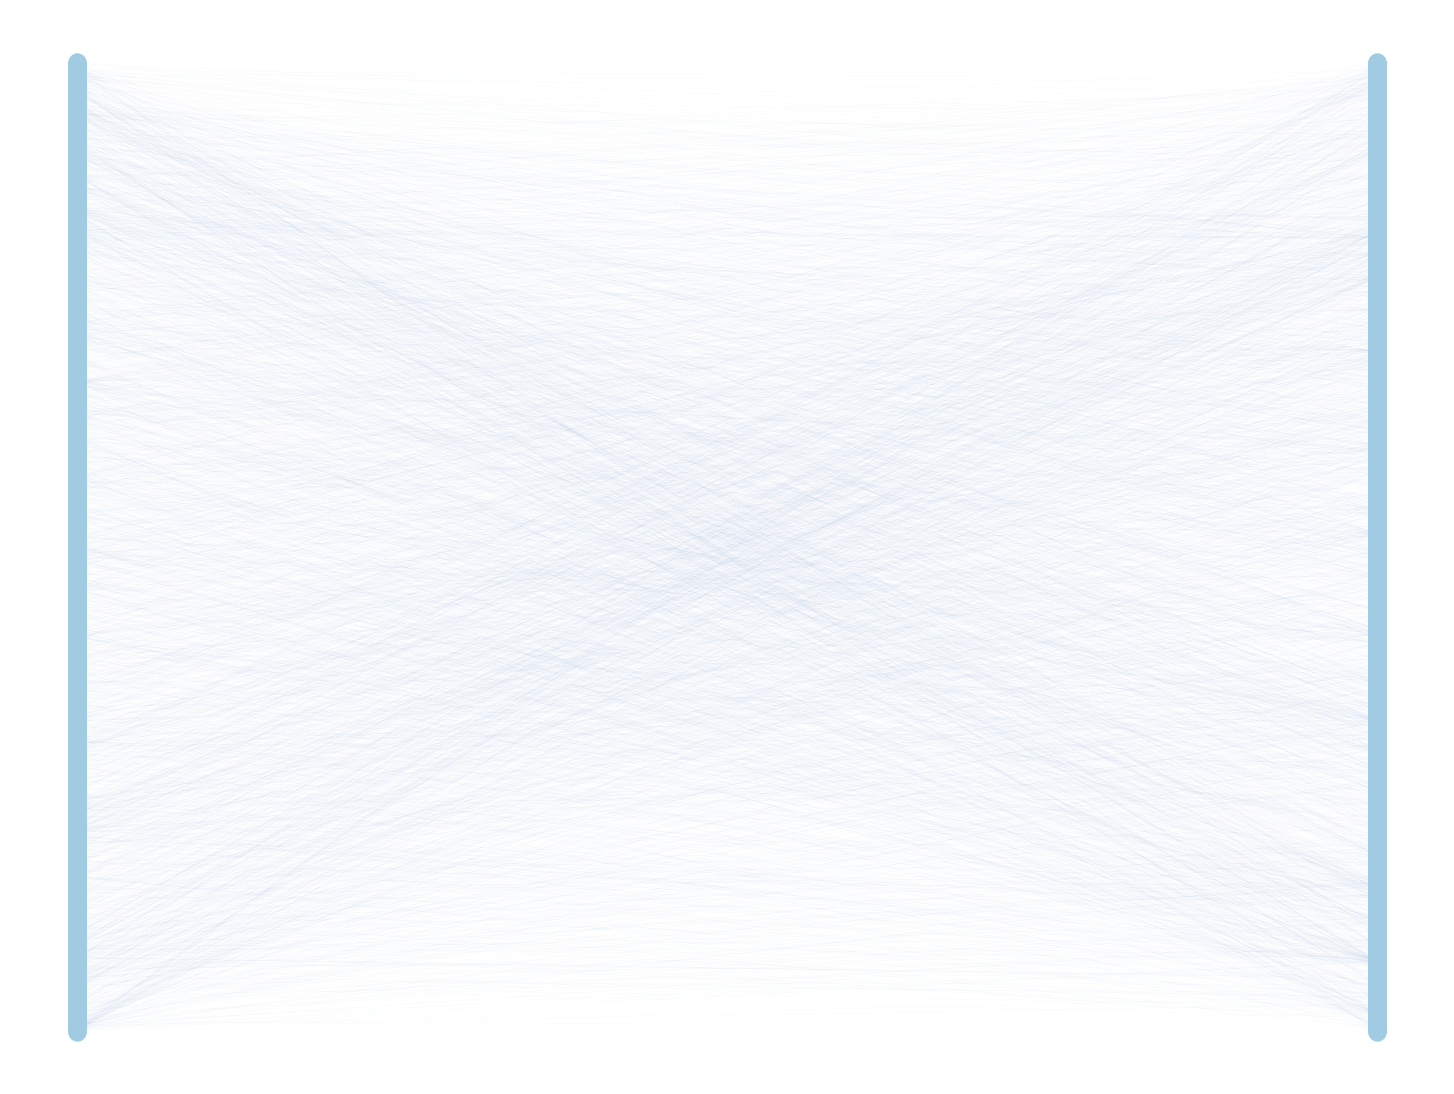

In [50]:
pos = nx.bipartite_layout(C_2019,top_nodes_2019)
plt.figure(figsize=[20,15])
# Pass that layout to nx.draw
nx.draw(C_2019,pos,node_color='#A0CBE2',edge_color='#0071C1',width=.01,
     edge_cmap=plt.cm.Blues,with_labels=False, )


# Network Analysis

## Helper functions

Create a function that returns the quantitative characteristics of a graph like the total number of nodes, number of edges, average degree, clustering coefficient, and number of communities present.

In [51]:
def graph_charac (G):
    N = G.order()
    L = G.size() 
#     D = G.diameter()
#     c = G.center()
    avg_deg = 2*float(L) / N 
    cc = nx.clustering(G)
    avg_clust = sum(cc.values()) / len(cc)
    partition = community.best_partition(G)
    print ('Nodes: ', N)
    print ('Edges: ', L)
    print ('Average degree: ', avg_deg)
#     print ('Diameter: ', D)
#     print ('Center: ', c)
    print('Clustering Coefficient: ',avg_clust)
    print ("Number of Communities: ", len(set(partition.values())))

To create a function that calculates the degree, betweeness, closeness, and eigenvector centralities for an input graph.

In [52]:
def graph_centrality(G):
    pos = nx.fruchterman_reingold_layout(G)
    fig = plt.figure(figsize=(20,15));

    centralities = [list(nx.degree_centrality(G).values()), 
                    list(nx.closeness_centrality(G).values()), 
                    list(nx.betweenness_centrality(G).values()),
                    list(nx.eigenvector_centrality(G).values())]
    titles = ['Degree Centrality', 'Closeness Centrality', 
              'Betweenness Centrality', 'Eigenvector Centrality']

    for i in range(4):
        ax = fig.add_subplot(2, 2, i+1);
        nc = nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r,
                                node_color=centralities[i]);
        nx.draw_networkx_edges(G, pos, alpha=0.500);
    #     nx.draw_networkx_labels(G, pos, font_color='k');
        plt.title(titles[i]);
        plt.axis('off');
        plt.colorbar(nc);

    plt.show();

In [53]:
def top20_closeness(G, data):
    d = nx.closeness_centrality(G)
    awardee = []
    for w in sorted(d, key=d.get, reverse=True):
        awardee.append(w)
    top20 = awardee[:20]
    top20_cp = []
    for c in top20:
        tot_cp = 0
        for i in range(len(data)):
            if data['Awardee Corporate Title'].iloc[i] == c:
                tot_cp = tot_cp + data['Contract Amount'].iloc[i]
        top20_cp.append(tot_cp)
    df3 = pd.DataFrame(list(zip(top20, top20_cp)), 
                   columns =['Awardee Corporate Title', 'Total Contract Amount']) 
    return df3

In [54]:
def top20_degree(G, data):
    d = nx.degree_centrality(G)
    awardee = []
    for w in sorted(d, key=d.get, reverse=True):
        awardee.append(w)
    top20 = awardee[:20]
    top20_cp = []
    for c in top20:
        tot_cp = 0
        for i in range(len(data)):
            if data['Awardee Corporate Title'].iloc[i] == c:
                tot_cp = tot_cp + data['Contract Amount'].iloc[i]
        top20_cp.append(tot_cp)
    df3 = pd.DataFrame(list(zip(top20, top20_cp)), 
                   columns =['Awardee Corporate Title', 'Total Contract Amount']) 
    return df3

In [55]:
def top20_bet(G, data):
    d = nx.betweenness_centrality(G)
    awardee = []
    for w in sorted(d, key=d.get, reverse=True):
        awardee.append(w)
    top20 = awardee[:20]
    top20_cp = []
    for c in top20:
        tot_cp = 0
        for i in range(len(data)):
            if data['Awardee Corporate Title'].iloc[i] == c:
                tot_cp = tot_cp + data['Contract Amount'].iloc[i]
        top20_cp.append(tot_cp)
    df3 = pd.DataFrame(list(zip(top20, top20_cp)), 
                   columns =['Awardee Corporate Title', 'Total Contract Amount']) 
    return df3

In [56]:
def top20_eigen(G, data):
    d = nx.eigenvector_centrality(G)
    awardee = []
    for w in sorted(d, key=d.get, reverse=True):
        awardee.append(w)
    top20 = awardee[:20]
    top20_cp = []
    for c in top20:
        tot_cp = 0
        for i in range(len(data)):
            if data['Awardee Corporate Title'].iloc[i] == c:
                tot_cp = tot_cp + data['Contract Amount'].iloc[i]
        top20_cp.append(tot_cp)
    df3 = pd.DataFrame(list(zip(top20, top20_cp)), 
                   columns =['Awardee Corporate Title', 'Total Contract Amount']) 
    return df3

The degree distribution for the bipartite and projected graphs will be displayed using the function `deg_distribution`

In [57]:
def deg_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    plt.loglog(deg,cnt)
    plt.title("Degree count plot")
    plt.ylabel("degree")
    plt.xlabel("count")


Create a function to plot different graph layouts.

In [58]:
def graph_layout(G):
    
    fig = plt.figure(figsize=(20,15));
    
    ax = fig.add_subplot(3, 3, 1);
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('fruchterman_reingold_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 2);
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('circular_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 3);
    pos = nx.random_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('random_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 4);
    pos = nx.shell_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('shell_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 5);
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('spring_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 6);
    pos = nx.spectral_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('spectral_layout');
    plt.axis('off');
    
    plt.show();

## 2019 Network Analysis


### Network Characteristics

Create a function that returns the quantitative characteristics of a graph like the total number of nodes, number of edges, average degree, clustering coefficient, and number of communities present.

In [59]:
graph_charac(C_2019)

Nodes:  2286
Edges:  2853
Average degree:  2.4960629921259843
Clustering Coefficient:  0.0
Number of Communities:  237


To analyze a bipartite graph, a projection of the top nodes and bottom nodes are created. The projected graph O is a network of government agencies connected if they have a corporation that was able to secure a contract from each of them. The projected graph A is a network of corporations/contractors that won a contract from the same government agency. 

In [60]:
O_2019 = bipartite.projected_graph(C_2019, top_nodes_2019)
A_2019 = bipartite.projected_graph(C_2019, bottom_nodes_2019)

In [61]:
graph_charac(O_2019)

Nodes:  1017
Edges:  7988
Average degree:  15.708947885939036
Clustering Coefficient:  0.5590410856640669
Number of Communities:  213


In [62]:
graph_charac(A_2019)

Nodes:  1416
Edges:  7777
Average degree:  10.984463276836157
Clustering Coefficient:  0.5910427810125123
Number of Communities:  219


### Network Centralities

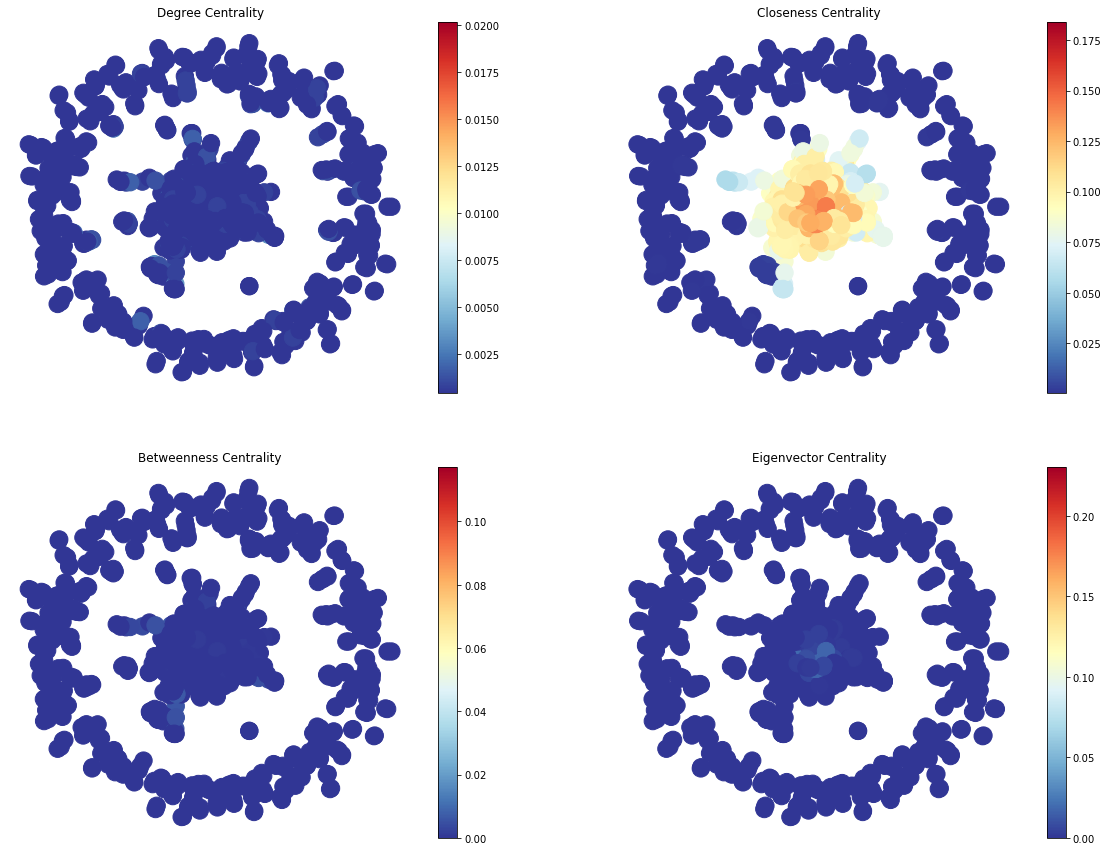

In [63]:
graph_centrality(C_2019)

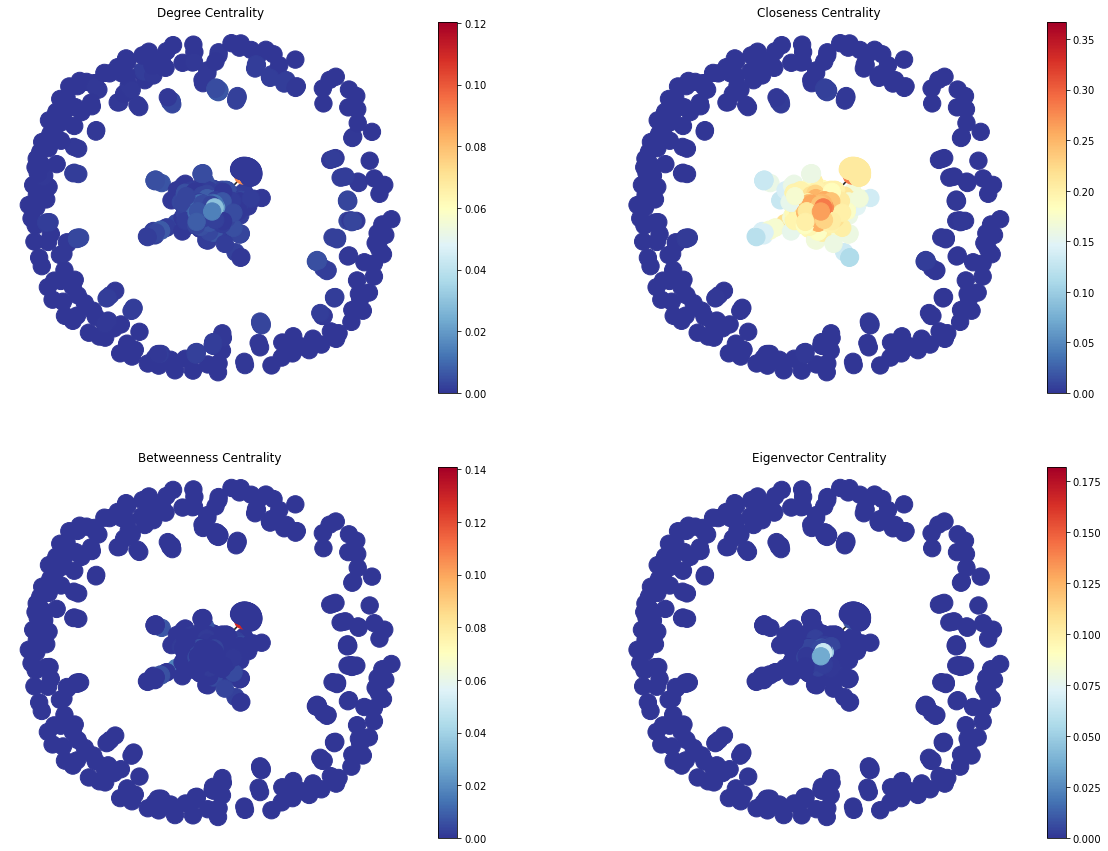

In [64]:
graph_centrality(A_2019)

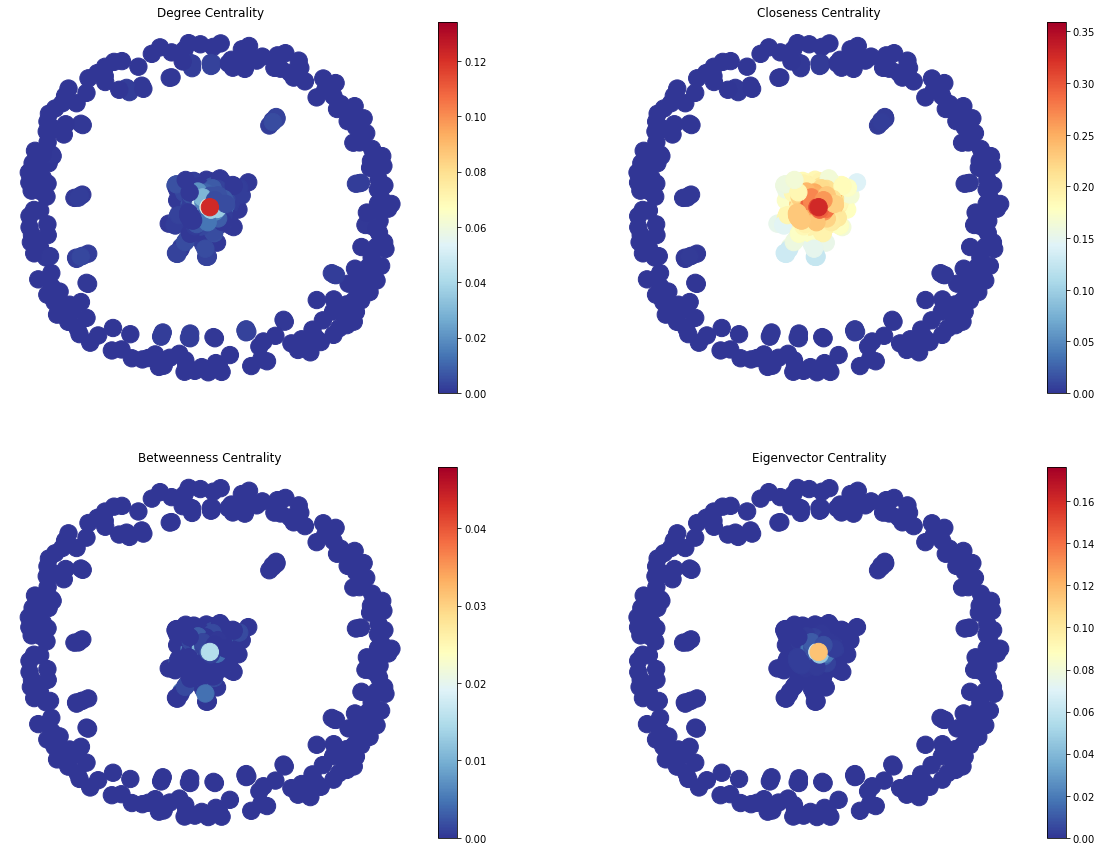

In [65]:
graph_centrality(O_2019)

### Top 20 by Network Centralities

After calculating the centralities, we rank them and get only the top 20. We then calculate the total contract amount won by the companies by contracting for the government last year.

In [66]:
top20_closeness(C_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.448106e+08
1                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
2               FOOD AND NUTRITION RESEARCH INSTITUTE           0.000000e+00
3                                 PROCUREMENT SERVICE           4.907202e+05
4                       THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
5             UNIVERSITY OF THE PHILIPPINES - DILIMAN           0.000000e+00
6            COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
7                  PHILIPPINE RICE RESEARCH INSTITUTE           0.000000e+00
8   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...           0.000000e+00
9                         TRENDS & TECHNOLOGIES, INC.           4.688980e+08
10         SILICON VALLEY COMPUTER GROUP PHILS., INC.           5.173935e+08
11  PHILIPPINE SCIENCE HIGH SCHOOL - MIMAROPA REGI...           0.000000e+00
12  MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
13                                     INFOWORX, INC.           6.596230e+07
14                               S1 TECHNOLOGIES INC.           2.114175e+07
15                             AVID SALES CORPORATION           1.796014e+06
16                GOVERNMENT SERVICE INSURANCE SYSTEM           0.000000e+00
17                      MAXIMUM SOLUTIONS CORPORATION           4.305727e+07
18                          BAYANPC TECHNOLOGIES INC.           3.872772e+06
19               QUARTZ BUSINESS PRODUCTS CORPORATION           2.552896e+07

In [67]:
top20_degree(C_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.448106e+08
1                  PHILIPPINE RICE RESEARCH INSTITUTE           0.000000e+00
2                 GOVERNMENT SERVICE INSURANCE SYSTEM           0.000000e+00
3          SILICON VALLEY COMPUTER GROUP PHILS., INC.           5.173935e+08
4   DEVELOPMENT BANK OF THE PHILIPPINES - HEAD OFFICE           0.000000e+00
5   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...           0.000000e+00
6                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
7             UNIVERSITY OF THE PHILIPPINES - DILIMAN           0.000000e+00
8                           DATAWORLD COMPUTER CENTER           4.890088e+07
9                                 PROCUREMENT SERVICE           4.907202e+05
10                   SUPREME COURT OF THE PHILIPPINES           0.000000e+00
11                        TRENDS & TECHNOLOGIES, INC.           4.688980e+08
12  MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
13                             SOCIAL SECURITY SYSTEM           0.000000e+00
14              FOOD AND NUTRITION RESEARCH INSTITUTE           0.000000e+00
15           COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
16                  INTEGRATED COMPUTER SYSTEMS, INC.           8.022074e+07
17                        ELECTROCOMPUTER DATA SYSTEM           1.147766e+07
18                        JONECO TECH MARKETING CORP.           1.609076e+07
19                             IMAX TECHNOLOGIES INC.           1.483433e+07

In [68]:
top20_bet(C_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.448106e+08
1          SILICON VALLEY COMPUTER GROUP PHILS., INC.           5.173935e+08
2                  PHILIPPINE RICE RESEARCH INSTITUTE           0.000000e+00
3                         TRENDS & TECHNOLOGIES, INC.           4.688980e+08
4                                      INFOWORX, INC.           6.596230e+07
5                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
6                        PHILIPPINE DUPLICATORS, INC.           2.904619e+06
7   DEPARTMENT OF HEALTH - TREATMENT AND REHABILIT...           0.000000e+00
8                           DATAWORLD COMPUTER CENTER           4.890088e+07
9   MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
10              FOOD AND NUTRITION RESEARCH INSTITUTE           0.000000e+00
11           ILOILO SCIENCE AND TECHNOLOGY UNIVERSITY           0.000000e+00
12            UNIVERSITY OF THE PHILIPPINES - DILIMAN           0.000000e+00
13                      THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
14  HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...           0.000000e+00
15        SECC COMPUTER SALES, SERVICES & ENTERPRISES           7.507003e+06
16                GOVERNMENT SERVICE INSURANCE SYSTEM           0.000000e+00
17                                PROCUREMENT SERVICE           4.907202e+05
18                            TARLAC STATE UNIVERSITY           0.000000e+00
19                               S1 TECHNOLOGIES INC.           2.114175e+07

In [69]:
top20_eigen(C_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...           0.000000e+00
1                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
2                QUARTZ BUSINESS PRODUCTS CORPORATION           2.552896e+07
3                LOCAL WATER UTILITIES ADMINISTRATION           0.000000e+00
4            COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
5                    SUPREME COURT OF THE PHILIPPINES           0.000000e+00
6                  PHILIPPINE RICE RESEARCH INSTITUTE           0.000000e+00
7                 GOVERNMENT SERVICE INSURANCE SYSTEM           0.000000e+00
8             UNIVERSITY OF THE PHILIPPINES - DILIMAN           0.000000e+00
9                                 PROCUREMENT SERVICE           4.907202e+05
10                          MASANGKAY COMPUTER CENTER           1.448106e+08
11              FOOD AND NUTRITION RESEARCH INSTITUTE           0.000000e+00
12                        TRENDS & TECHNOLOGIES, INC.           4.688980e+08
13                      MAXIMUM SOLUTIONS CORPORATION           4.305727e+07
14                          BAYANPC TECHNOLOGIES INC.           3.872772e+06
15                            ADVANCE SOLUTIONS, INC.           1.774042e+08
16                               S1 TECHNOLOGIES INC.           2.114175e+07
17                      THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
18             DEVELOPMENT ACADEMY OF THE PHILIPPINES           0.000000e+00
19  MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08

In [70]:
top20_closeness(A_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.448106e+08
1                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
2                         TRENDS & TECHNOLOGIES, INC.           4.688980e+08
3            COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
4                       THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
5                                S1 TECHNOLOGIES INC.           2.114175e+07
6   MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
7                                      INFOWORX, INC.           6.596230e+07
8                              AVID SALES CORPORATION           1.796014e+06
9                           BAYANPC TECHNOLOGIES INC.           3.872772e+06
10                      MAXIMUM SOLUTIONS CORPORATION           4.305727e+07
11               QUARTZ BUSINESS PRODUCTS CORPORATION           2.552896e+07
12                              YNZAL MARKETING CORP.           3.571176e+06
13         SILICON VALLEY COMPUTER GROUP PHILS., INC.           5.173935e+08
14            TIGER CONSULTING AND SOFTWARE DEVT INC.           4.885393e+06
15                 GEODATA SYSTEMS TECHNOLOGIES, INC.           5.372430e+07
16                    ACCENT MICRO TECHNOLOGIES, INC.           1.700602e+08
17                        COLUMBIA TECHNOLOGIES, INC.           2.287856e+09
18                            ADVANCE SOLUTIONS, INC.           1.774042e+08
19                        JONECO TECH MARKETING CORP.           1.609076e+07

In [71]:
top20_degree(A_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                         TRENDS & TECHNOLOGIES, INC.           4.688980e+08
1                           MASANGKAY COMPUTER CENTER           1.448106e+08
2                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
3            COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
4                                 PROCUREMENT SERVICE           4.907202e+05
5                QUARTZ BUSINESS PRODUCTS CORPORATION           2.552896e+07
6                       THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
7                               YNZAL MARKETING CORP.           3.571176e+06
8                       MAXIMUM SOLUTIONS CORPORATION           4.305727e+07
9                                S1 TECHNOLOGIES INC.           2.114175e+07
10                        COLUMBIA TECHNOLOGIES, INC.           2.287856e+09
11                          BAYANPC TECHNOLOGIES INC.           3.872772e+06
12  MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
13                      INFOBAHN COMMUNICATIONS, INC.           4.132089e+07
14                                     INFOWORX, INC.           6.596230e+07
15                            ADVANCE SOLUTIONS, INC.           1.774042e+08
16                    ACCENT MICRO TECHNOLOGIES, INC.           1.700602e+08
17                          EPARTNERS SOLUTIONS, INC.           6.958710e+06
18                                          PLDT INC.           7.775603e+07
19                 GEODATA SYSTEMS TECHNOLOGIES, INC.           5.372430e+07

In [72]:
top20_bet(A_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                           MASANGKAY COMPUTER CENTER           1.448106e+08
1                                 PROCUREMENT SERVICE           4.907202e+05
2                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
3          SILICON VALLEY COMPUTER GROUP PHILS., INC.           5.173935e+08
4                         TRENDS & TECHNOLOGIES, INC.           4.688980e+08
5                                      INFOWORX, INC.           6.596230e+07
6                        PHILIPPINE DUPLICATORS, INC.           2.904619e+06
7                       THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
8   MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
9                           DATAWORLD COMPUTER CENTER           4.890088e+07
10            TIGER CONSULTING AND SOFTWARE DEVT INC.           4.885393e+06
11                 GEODATA SYSTEMS TECHNOLOGIES, INC.           5.372430e+07
12                LGT TRADING AND GENERAL MERCHANDISE           2.763795e+06
13                               S1 TECHNOLOGIES INC.           2.114175e+07
14         TOUCHMEDIA SUPPLY AND SERVICES CORPORATION           8.400000e+06
15           COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
16                        COLUMBIA TECHNOLOGIES, INC.           2.287856e+09
17                      MAXIMUM SOLUTIONS CORPORATION           4.305727e+07
18        SECC COMPUTER SALES, SERVICES & ENTERPRISES           7.507003e+06
19                                          PLDT INC.           7.775603e+07

In [73]:
top20_eigen(A_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0            COMPUCARE CORPORATION (COMPUCARE CENTER)           1.504507e+07
1                          AMERICAN TECHNOLOGIES INC.           4.199308e+07
2                               YNZAL MARKETING CORP.           3.571176e+06
3                         TRENDS & TECHNOLOGIES, INC.           4.688980e+08
4                QUARTZ BUSINESS PRODUCTS CORPORATION           2.552896e+07
5                       THE VALUE SYSTEMS PHILS. INC.           6.072362e+06
6                           BAYANPC TECHNOLOGIES INC.           3.872772e+06
7                                S1 TECHNOLOGIES INC.           2.114175e+07
8                       MAXIMUM SOLUTIONS CORPORATION           4.305727e+07
9                             ADVANCE SOLUTIONS, INC.           1.774042e+08
10                        COLUMBIA TECHNOLOGIES, INC.           2.287856e+09
11                             AVID SALES CORPORATION           1.796014e+06
12                          EPARTNERS SOLUTIONS, INC.           6.958710e+06
13  MICROGENESIS SOFTWARE, INC. DOING BUSINESS UND...           1.133337e+08
14                         CD TECHNOLOGIES ASIA, INC.           1.418295e+06
15                      INFOBAHN COMMUNICATIONS, INC.           4.132089e+07
16                    ACCENT MICRO TECHNOLOGIES, INC.           1.700602e+08
17                      UNISON COMPUTER SYSTEMS, INC.           3.990982e+07
18                                        EPLDT, INC.           2.774479e+07
19                                          PLDT INC.           7.775603e+07

In [74]:
top20_closeness(O_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0               FOOD AND NUTRITION RESEARCH INSTITUTE                    0.0
1             UNIVERSITY OF THE PHILIPPINES - DILIMAN                    0.0
2   DEPARTMENT OF HEALTH - TREATMENT AND REHABILIT...                    0.0
3                  PHILIPPINE RICE RESEARCH INSTITUTE                    0.0
4   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...                    0.0
5                 GOVERNMENT SERVICE INSURANCE SYSTEM                    0.0
6                      CENTRAL LUZON STATE UNIVERSITY                    0.0
7                DEPARTMENT OF AGRICULTURE - REGION X                    0.0
8                             BATAAN GENERAL HOSPITAL                    0.0
9       PHILIPPINE HEALTH INSURANCE CORPORATION - NCR                    0.0
10                     DEPARTMENT OF EDUCATION - MAIN                    0.0
11                            TARLAC STATE UNIVERSITY                    0.0
12       ENVIRONMENTAL MANAGEMENT BUREAU - REGION III                    0.0
13  PHILIPPINE SCIENCE HIGH SCHOOL - MIMAROPA REGI...                    0.0
14                          DAVAO CITY WATER DISTRICT                    0.0
15               LOCAL WATER UTILITIES ADMINISTRATION                    0.0
16  NATIONAL ECONOMIC AND DEVELOPMENT AUTHORITY - ...                    0.0
17                                PROCUREMENT SERVICE               490720.2
18             MANILA INTERNATIONAL AIRPORT AUTHORITY                    0.0
19                   SUPREME COURT OF THE PHILIPPINES                    0.0

In [75]:
top20_degree(O_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0               FOOD AND NUTRITION RESEARCH INSTITUTE                    0.0
1                  PHILIPPINE RICE RESEARCH INSTITUTE                    0.0
2             UNIVERSITY OF THE PHILIPPINES - DILIMAN                    0.0
3   HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...                    0.0
4                    SUPREME COURT OF THE PHILIPPINES                    0.0
5                                 PROCUREMENT SERVICE               490720.2
6                LOCAL WATER UTILITIES ADMINISTRATION                    0.0
7   DEPARTMENT OF HEALTH - TREATMENT AND REHABILIT...                    0.0
8                 GOVERNMENT SERVICE INSURANCE SYSTEM                    0.0
9   PHILIPPINE SCIENCE HIGH SCHOOL - MIMAROPA REGI...                    0.0
10  NATIONAL ECONOMIC AND DEVELOPMENT AUTHORITY - ...                    0.0
11             DEVELOPMENT ACADEMY OF THE PHILIPPINES                    0.0
12            PHILIPPINE HEALTH INSURANCE CORPORATION                    0.0
13              OFFICE OF THE OMBUDSMAN - MAIN OFFICE                    0.0
14                          DAVAO CITY WATER DISTRICT                    0.0
15                     CENTRAL LUZON STATE UNIVERSITY                    0.0
16                        DEPARTMENT OF HEALTH - MAIN                    0.0
17                            TARLAC STATE UNIVERSITY                    0.0
18                            BATAAN GENERAL HOSPITAL                    0.0
19       ENVIRONMENTAL MANAGEMENT BUREAU - REGION III                    0.0

In [76]:
top20_bet(O_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                  PHILIPPINE RICE RESEARCH INSTITUTE                    0.0
1   DEPARTMENT OF HEALTH - TREATMENT AND REHABILIT...                    0.0
2   PHILIPPINE SCIENCE HIGH SCHOOL - MIMAROPA REGI...                    0.0
3            ILOILO SCIENCE AND TECHNOLOGY UNIVERSITY                    0.0
4                           DAVAO CITY WATER DISTRICT                    0.0
5                                    BICOL UNIVERSITY                    0.0
6               FOOD AND NUTRITION RESEARCH INSTITUTE                    0.0
7                DEPARTMENT OF AGRICULTURE - REGION X                    0.0
8             UNIVERSITY OF THE PHILIPPINES - DILIMAN                    0.0
9                             TARLAC STATE UNIVERSITY                    0.0
10  DEPARTMENT OF PUBLIC WORKS AND HIGHWAYS - QUEZ...                    0.0
11                                PROCUREMENT SERVICE               490720.2
12            CITY OF GENERAL SANTOS , SOUTH COTABATO                    0.0
13  DEPARTMENT OF ENVIRONMENT AND NATURAL RESOURCE...                    0.0
14                              CITY OF MANDAUE, CEBU                    0.0
15  HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...                    0.0
16                      ZAMBOANGA CITY MEDICAL CENTER                    0.0
17                GOVERNMENT SERVICE INSURANCE SYSTEM                    0.0
18                    MARIANO MARCOS STATE UNIVERSITY                    0.0
19            DEPARTMENT OF AGRICULTURE - REGION VIII                    0.0

In [77]:
top20_bet(O_2019, data_2019)

Awardee Corporate Title  Total Contract Amount
0                  PHILIPPINE RICE RESEARCH INSTITUTE                    0.0
1   DEPARTMENT OF HEALTH - TREATMENT AND REHABILIT...                    0.0
2   PHILIPPINE SCIENCE HIGH SCHOOL - MIMAROPA REGI...                    0.0
3            ILOILO SCIENCE AND TECHNOLOGY UNIVERSITY                    0.0
4                           DAVAO CITY WATER DISTRICT                    0.0
5                                    BICOL UNIVERSITY                    0.0
6               FOOD AND NUTRITION RESEARCH INSTITUTE                    0.0
7                DEPARTMENT OF AGRICULTURE - REGION X                    0.0
8             UNIVERSITY OF THE PHILIPPINES - DILIMAN                    0.0
9                             TARLAC STATE UNIVERSITY                    0.0
10  DEPARTMENT OF PUBLIC WORKS AND HIGHWAYS - QUEZ...                    0.0
11                                PROCUREMENT SERVICE               490720.2
12            CITY OF GENERAL SANTOS , SOUTH COTABATO                    0.0
13  DEPARTMENT OF ENVIRONMENT AND NATURAL RESOURCE...                    0.0
14                              CITY OF MANDAUE, CEBU                    0.0
15  HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...                    0.0
16                      ZAMBOANGA CITY MEDICAL CENTER                    0.0
17                GOVERNMENT SERVICE INSURANCE SYSTEM                    0.0
18                    MARIANO MARCOS STATE UNIVERSITY                    0.0
19            DEPARTMENT OF AGRICULTURE - REGION VIII                    0.0

In [78]:
x = nx.degree_centrality(C_2019)
{k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}

{'MASANGKAY COMPUTER CENTER': 0.02013129102844639,
 'PHILIPPINE RICE RESEARCH INSTITUTE': 0.01487964989059081,
 'GOVERNMENT SERVICE INSURANCE SYSTEM': 0.013129102844638951,
 'SILICON VALLEY COMPUTER GROUP PHILS., INC.': 0.01225382932166302,
 'DEVELOPMENT BANK OF THE PHILIPPINES - HEAD OFFICE': 0.011816192560175055,
 'HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQUARTERS': 0.011816192560175055,
 'AMERICAN TECHNOLOGIES INC.': 0.01137855579868709,
 'UNIVERSITY OF THE PHILIPPINES - DILIMAN': 0.01050328227571116,
 'DATAWORLD COMPUTER CENTER': 0.01050328227571116,
 'PROCUREMENT SERVICE': 0.00962800875273523,
 'SUPREME COURT OF THE PHILIPPINES': 0.00962800875273523,
 'TRENDS & TECHNOLOGIES, INC.': 0.00962800875273523,
 'MICROGENESIS SOFTWARE, INC. DOING BUSINESS UNDER THE NAME AND STYLE OF MICROGENESIS BUSINESS SYSTEMS': 0.00962800875273523,
 'SOCIAL SECURITY SYSTEM': 0.009190371991247266,
 'FOOD AND NUTRITION RESEARCH INSTITUTE': 0.0087527352297593,
 'COMPUCARE CORPORATION (COMPUCARE CENTER)

In [79]:
data_2019.loc[data_2019['Awardee Corporate Title']=='MASANGKAY COMPUTER CENTER']

Organization Name  \
23658   PHILIPPINE SCIENCE HIGH SCHOOL - CALABARZON RE...   
26438    NATIONAL IRRIGATION ADMINISTRATION - REGION IV-B   
26439    NATIONAL IRRIGATION ADMINISTRATION - REGION IV-B   
29250          PHILIPPINE SCIENCE HIGH SCHOOL - REGION XI   
33632                      CENTRAL LUZON STATE UNIVERSITY   
...                                                   ...   
825621  DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - P...   
854779  DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - P...   
888444  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
891189         PHILIPPINE SCIENCE HIGH SCHOOL - REGION XI   
946890  DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - R...   

                                             Notice Title  \
23658   INVITATION TO BID FOR THE PROCUREMENT OF SOFTW...   
26438   Supply and Delivery of IT Equipments, Lot 1 & ...   
26439   Supply and Delivery of IT Equipments, Lot 1 & ...   
29250   INVITATION TO BID  Negotiated Procurement of  ...   
33632                            RFQ Laptop for CHSI-DTGT   
...                                                   ...   
825621  PROCUREMENT OF TWENTY-TWO (22) DESKTOP COMPUTE...   
854779  Procurement of Information Communication Techn...   
888444  PURCHASE OF LAPTOPS FOR THE LISTAHANAN 3 ASSES...   
891189  INVITATION TO BID  PROCUREMENT OF ADDITIONAL I...   
946890  INVITATION TO BID FOR PURCHASE OF VARIOUS INFO...   

          Awardee Corporate Title  Contract Amount  
23658   MASANGKAY COMPUTER CENTER        3944068.0  
26438   MASANGKAY COMPUTER CENTER        1359998.0  
26439   MASANGKAY COMPUTER CENTER         284998.0  
29250   MASANGKAY COMPUTER CENTER        1473805.0  
33632   MASANGKAY COMPUTER CENTER         117600.0  
...                           ...              ...  
825621  MASANGKAY COMPUTER CENTER        1365184.0  
854779  MASANGKAY COMPUTER CENTER        2325645.0  
888444  MASANGKAY COMPUTER CENTER        2032050.0  
891189  MASANGKAY COMPUTER CENTER        1068808.0  
946890  MASANGKAY COMPUTER CENTER        1658888.0  

[71 rows x 4 columns]

In [80]:
df_final_2019.loc[df_final_2019['Awardee Corporate Title']=='MASANGKAY COMPUTER CENTER'].sort_values(by=['weight'])

Organization Name  \
1048  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
2758            UNIVERSITY OF THE PHILIPPINES - DILIMAN   
1049  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
1053  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
1179        ENVIRONMENTAL MANAGEMENT BUREAU - CAR, DENR   
1188       ENVIRONMENTAL MANAGEMENT BUREAU - REGION III   
1448             MANILA INTERNATIONAL AIRPORT AUTHORITY   
1560               MUNICIPALITY OF BANGUI, ILOCOS NORTE   
1832  NATIONAL CONCILIATION AND MEDIATION BOARD - RE...   
1932                         NATIONAL POLICE COMMISSION   
1939              NATIONAL STATISTICS OFFICE - REGION I   
1991   NUEVA ECIJA UNIVERSITY OF SCIENCE AND TECHNOLOGY   
2157      PHILIPPINE HEALTH INSURANCE CORPORATION - NCR   
2567      RESEARCH INSTITUTE FOR TROPICAL MEDICINE, DOH   
2628                    SOUTHERN LEYTE STATE UNIVERSITY   
2717                 UNIVERSITY OF NORTHERN PHILIPPINES   
1047  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
1038  DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...   
2829  WEST VISAYAS STATE UNIVERSITY MEDICAL CENTER -...   
582                 COMMISSION ON AUDIT - COTABATO CITY   
262            CAVITE STATE UNIVERSITY - ROSARIO CAMPUS   
886   DEPARTMENT OF HEALTH - TREATMENT AND REHABILIT...   
599                             COMMISSION ON ELECTIONS   
620                           DAVAO CITY WATER DISTRICT   
467                                       CITY OF PASIG   
661                   DEPARTMENT OF AGRICULTURE - CARFU   
158                  BULACAN AGRICULTURAL STATE COLLEGE   
771   DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - P...   
780   DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - P...   
794   DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - P...   
115                            BATANES GENERAL HOSPITAL   
681   DEPARTMENT OF AGRICULTURE - REGION IV-B (MIMAR...   
155         BOHOL ISLAND STATE UNIVERSITY - MAIN CAMPUS   
2324         PHILIPPINE SCIENCE HIGH SCHOOL - REGION XI   
2307  PHILIPPINE SCIENCE HIGH SCHOOL - CALABARZON RE...   
297                      CENTRAL LUZON STATE UNIVERSITY   
928    DEPARTMENT OF LABOR AND EMPLOYMENT - REGION IV-B   
1897   NATIONAL IRRIGATION ADMINISTRATION - REGION IV-B   
1475                          MARIVELES MENTAL HOSPITAL   
1209              FOOD AND NUTRITION RESEARCH INSTITUTE   
815   DEPARTMENT OF ENVIRONMENT AND NATURAL RES. - R...   
1456                    MARIANO MARCOS STATE UNIVERSITY   
446                                  CITY OF MUNTINLUPA   
2320  PHILIPPINE SCIENCE HIGH SCHOOL - MIMAROPA REGI...   
110                             BATAAN GENERAL HOSPITAL   
702             DEPARTMENT OF AGRICULTURE - REGION VIII   

        Awardee Corporate Title  weight  
1048  MASANGKAY COMPUTER CENTER       1  
2758  MASANGKAY COMPUTER CENTER       1  
1049  MASANGKAY COMPUTER CENTER       1  
1053  MASANGKAY COMPUTER CENTER       1  
1179  MASANGKAY COMPUTER CENTER       1  
1188  MASANGKAY COMPUTER CENTER       1  
1448  MASANGKAY COMPUTER CENTER       1  
1560  MASANGKAY COMPUTER CENTER       1  
1832  MASANGKAY COMPUTER CENTER       1  
1932  MASANGKAY COMPUTER CENTER       1  
1939  MASANGKAY COMPUTER CENTER       1  
1991  MASANGKAY COMPUTER CENTER       1  
2157  MASANGKAY COMPUTER CENTER       1  
2567  MASANGKAY COMPUTER CENTER       1  
2628  MASANGKAY COMPUTER CENTER       1  
2717  MASANGKAY COMPUTER CENTER       1  
1047  MASANGKAY COMPUTER CENTER       1  
1038  MASANGKAY COMPUTER CENTER       1  
2829  MASANGKAY COMPUTER CENTER       1  
582   MASANGKAY COMPUTER CENTER       1  
262   MASANGKAY COMPUTER CENTER       1  
886   MASANGKAY COMPUTER CENTER       1  
599   MASANGKAY COMPUTER CENTER       1  
620   MASANGKAY COMPUTER CENTER       1  
467   MASANGKAY COMPUTER CENTER       1  
661   MASANGKAY COMPUTER CENTER       1  
158   MASANGKAY COMPUTER CENTER       1  
771   MASANGKAY COMPUTER CENTER       1  
780   MASANGKAY COMPUTER CENTER       1  
794 

### Degree Distribution

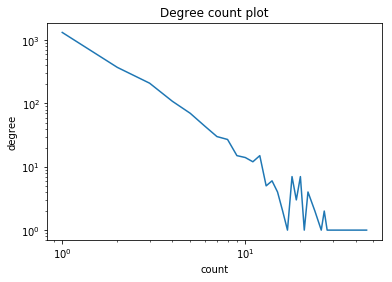

In [81]:
deg_distribution(C_2019)

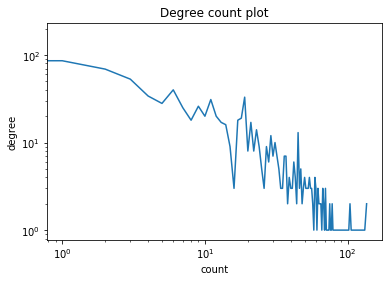

In [82]:
deg_distribution(O_2019)

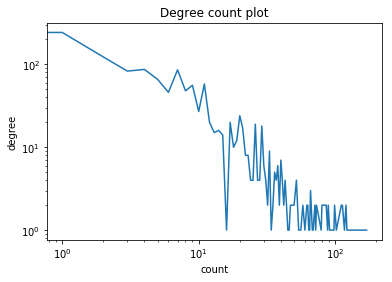

In [83]:
deg_distribution(A_2019)

Different layouts for the projected graph A was tested.

The bipartite and projected graphs exhibit a power law distribution of their degrees.

### Exploring Graph Layouts

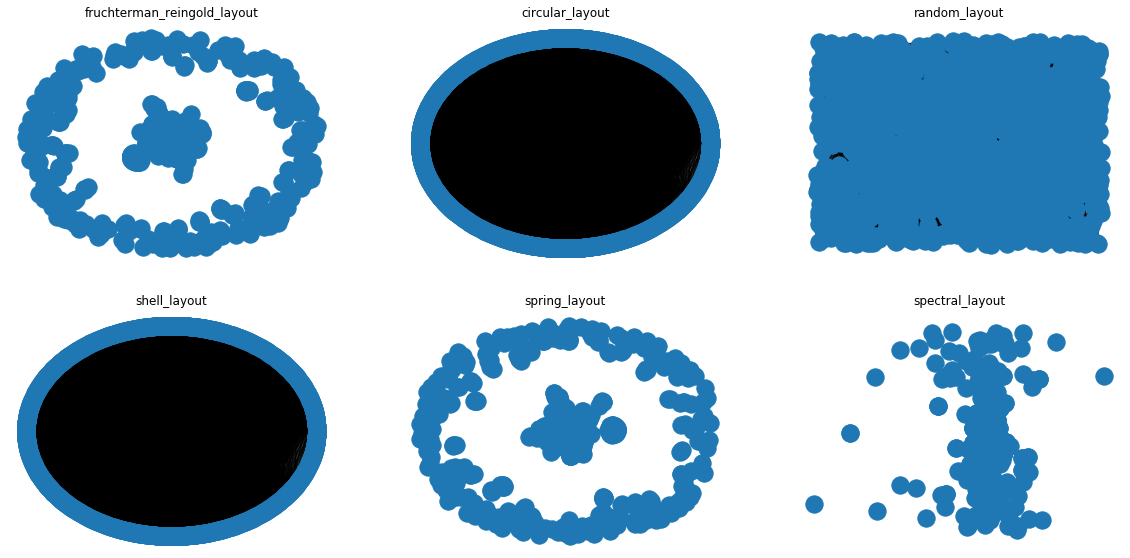

In [84]:
graph_layout(A_2019)

To be able to create Gephi visualtizations of the graph, we convert it to **gexf**

In [85]:
#Convert to gexf for Gephi
nx.write_gexf(C_2019, "C_all_IT2019.gexf")
nx.write_gexf(O_2019, "O_all_IT2019.gexf")
nx.write_gexf(A_2019, "A_all_IT2019.gexf")

### Plotting Communities

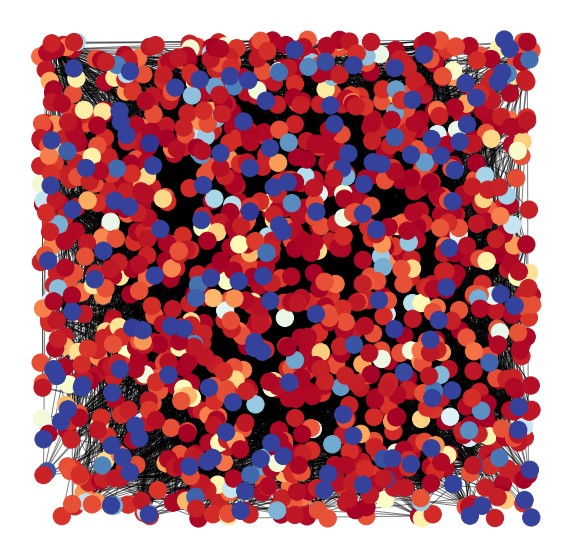

Number of Communities:  221


In [86]:
G_2019 = A_2019
partition = community.best_partition(G_2019)

plt.figure(figsize=(10,10))
plt.axis('off')
pos = nx.random_layout(G_2019)
nx.draw_networkx_nodes(G_2019, pos, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_2019, pos, alpha=0.5)
# nx.draw_networkx_labels(G, pos)
plt.show()
print ("Number of Communities: ", len(set(partition.values())))